In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib Inline
import warnings
warnings.filterwarnings('ignore')

In [100]:
pd.set_option('display.max_column',500)
df=pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [102]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [103]:
df.shape

(99999, 226)

# HANDLING MISSING VALUES

Handling Missing Values in Columns

In [104]:
# Checking Percent of Missing values in Columns:
missing_values= (df.isnull().sum()/len(df.index))*100
missing_values_df=pd.DataFrame(missing_values)
missing_values_df=missing_values_df.rename(columns={0:'null_percentage'})
missing_values_df.sort_values(by='null_percentage',ascending=False)

,null_percentage
arpu_3g_6,74.846748
night_pck_user_6,74.846748
total_rech_data_6,74.846748
arpu_2g_6,74.846748
max_rech_data_6,74.846748
...,...
max_rech_amt_7,0.000000
max_rech_amt_6,0.000000
total_rech_amt_9,0.000000
total_rech_amt_8,0.000000


In [105]:
# Columns with more than 30 Percent Missing Values:
col_missing_30=missing_values_df[missing_values_df.null_percentage>30].index
col_missing_30

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [106]:
#Dropping Columns with More than 30% Missing values:
df=df.drop(col_missing_30,axis=1)
df.shape

(99999, 186)

Date Columns are irrelevant for Analysis so we can Drop the Columns which Include Dates

In [107]:
date_col=[i for i in df.columns if 'date' in i]
date_col

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [108]:
df=df.drop(date_col,axis=1)
df.shape

(99999, 178)

In [109]:
#Checking Columns which have only 1unique values
unique_col=[]
for col in df.columns:
     if df[col].nunique()==1:
        unique_col.append(col)
unique_col

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [110]:
for i in unique_col:
    print("*"*50)
    print(df[i].value_counts())
    print("*"*50)

**************************************************
circle_id
109    99999
Name: count, dtype: int64
**************************************************
**************************************************
loc_og_t2o_mou
0.0    98981
Name: count, dtype: int64
**************************************************
**************************************************
std_og_t2o_mou
0.0    98981
Name: count, dtype: int64
**************************************************
**************************************************
loc_ic_t2o_mou
0.0    98981
Name: count, dtype: int64
**************************************************
**************************************************
std_og_t2c_mou_6
0.0    96062
Name: count, dtype: int64
**************************************************
**************************************************
std_og_t2c_mou_7
0.0    96140
Name: count, dtype: int64
**************************************************
**************************************************
std_og_t2c_mou

In [111]:
df=df.drop(unique_col,axis=1)
df.shape

(99999, 166)

# Filter High Value Customers

In [112]:
# 70th Percentiles of avg amount recharged in good phase
df['avg_rech_amt_6_7']=(df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [113]:
X=df['avg_rech_amt_6_7'].quantile(0.70)
X

368.5

In [114]:
df=df[df['avg_rech_amt_6_7']>=X]
df.shape

(30011, 167)

# Handling Missing Values in Rows

In [115]:
# rows having more than 50 percent Value:
df_missing_rows_50=df[(df.isnull().sum(axis=1))>(len(df.columns)//2)]
df_missing_rows_50

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
2185,7000237332,386.514,386.506,386.491,386.493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2,4,455,455,455,455,455,455,455,455,455,455,455,0,3.65,71.00,11.73,9.97,285.63,2316.13,1429.59,1205.97,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,882,172.71,657.55,9.22,0.0,455.0
3506,7002324263,996.558,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,0,0,875,0,0,0,550,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2033,0.00,0.00,0.00,0.0,437.5
4190,7000293582,2502.516,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [116]:
#droping rows with more than 50 Percent missing values:
df=df.drop(df_missing_rows_50.index)
df.shape

(29897, 167)

In [117]:
missing_col=round((df.isnull().sum()/len(df.index))*100,2)
df_missing_col=pd.DataFrame(missing_col)
df_missing_col=df_missing_col.rename(columns=({0:'missing'}))
df_missing_col.sort_values(by='missing',ascending=False).head(100)

,missing
og_others_9,5.32
roam_ic_mou_9,5.32
loc_og_t2f_mou_9,5.32
loc_og_t2m_mou_9,5.32
isd_og_mou_9,5.32
...,...
std_og_t2t_mou_7,0.63
std_og_t2f_mou_7,0.63
loc_og_t2t_mou_7,0.63
std_og_mou_7,0.63


In [118]:
df_missing_col[df_missing_col['missing']==5.32].index

Index(['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9',
       'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9',
       'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9'],
      dtype='object')

In [119]:
# Creating DataFrame in which values for MOU(9) are null,as all columns values have same percentage of missing values for MOU(9) all columns have missing values for paricular indexs:
df_missing_mou_9=df[(df['onnet_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['loc_og_t2t_mou_9'].isnull()) & (df['loc_og_t2m_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull())
                    & (df['std_og_t2f_mou_9'].isnull()) & (df[ 'std_og_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df[ 'spl_og_mou_9'].isnull()) & (df['og_others_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['loc_ic_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull())
                    & (df['std_ic_t2f_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) &  (df['spl_ic_mou_9'].isnull()) & (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull())]

In [120]:
df_missing_mou_9

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.00,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.00,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.0,0.00,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.00,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,484.36,413.28,199.64,NaN,0.00,0.00,0.00,NaN,2.54,11.81,2.01,NaN,0.86,0.0,0.0,NaN,511.16,465.91,231.03,0.0,11.61,32.89,4.46,NaN,16.94,26.94,26.63,NaN,0.98,0.63,0.00,NaN,29.54,60.48,31.09,NaN,0.49,1.36,1.06,NaN,0.00,4.16,0.00,NaN,0.00,0.00,0.00,NaN,0.49,5.53,1.06,NaN,32.04,67.84,32.16,0.0,0.63,0.0,0.00,NaN,0.00,0.00,0.00,NaN,1.36,1.83,0.00,NaN,14,17,14,3,432,328,206,0,36,44,36,0,30,20,0,0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50

In [121]:
df=df.drop(df_missing_mou_9.index)
df.shape

(28307, 167)

In [122]:
missing_col=round((df.isnull().sum()/len(df.index))*100,2)
df_missing_col=pd.DataFrame(missing_col)
df_missing_col=df_missing_col.rename(columns=({0:'missing'}))
df_missing_col.sort_values(by='missing',ascending=False).head(100)

,missing
loc_ic_t2f_mou_8,0.55
loc_og_t2f_mou_8,0.55
spl_og_mou_8,0.55
loc_og_t2m_mou_8,0.55
loc_ic_t2t_mou_8,0.55
...,...
max_rech_amt_7,0.00
monthly_3g_6,0.00
vol_2g_mb_9,0.00
last_day_rch_amt_9,0.00


In [123]:
df_missing_col[df_missing_col['missing']==0.55].index

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'ic_others_8'],
      dtype='object')

In [124]:
df_missing_mou_8=df[(df['onnet_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['loc_og_t2t_mou_8'].isnull()) & (df['loc_og_t2m_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull())
                    & (df['std_og_t2f_mou_8'].isnull()) & (df[ 'std_og_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df[ 'spl_og_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['loc_ic_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull())
                    & (df['std_ic_t2f_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) &  (df['spl_ic_mou_8'].isnull()) & (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull())]

In [125]:
df_missing_mou_8

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,580.477,111.878,0.0,378.881,249.43,39.64,NaN,245.06,62.24,37.24,NaN,144.53,25.49,19.43,NaN,0.00,312.59,78.58,NaN,0.00,0.00,0.00,NaN,11.54,0.00,0.00,NaN,25.31,0.00,0.00,NaN,0.0,0.00,0.0,NaN,0.41,0.00,0.00,NaN,36.86,0.00,0.00,NaN,233.51,0.00,0.00,NaN,118.79,0.0,0.0,NaN,0.0,0.00,0.00,NaN,352.31,0.0,0.0,NaN,0.0,0.00,0.00,NaN,4.78,0.00,0.0,NaN,0.0,0.00,0.00,0.0,393.96,0.00,0.00,NaN,6.74,0.00,0.00,NaN,38.53,0.00,0.00,NaN,0.0,0.00,0.00,NaN,45.28,0.00,0.00,NaN,8.31,0.00,0.00,NaN,27.31,0.00,0.00,NaN,0.0,0.00,0.00,NaN,35.63,0.00,0.00,0.0,80.91,0.00,0.0,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.0,NaN,0.0,17,6,3,11,700,130,0,440,80,50,0,50,30,0,0,30,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1102,0.0,0.00,0.00,0.00,415.0
578,7000248548,569.612,237.289,0.0,4.440,718.01,212.73,NaN,0.00,487.06,139.71,NaN,1.26,0.00,2.01,NaN,6.43,0.00,6.30,NaN,1.26,11.28,27.89,NaN,0.00,42.24,46.94,NaN,0.00,0.00,0.00,NaN,0.0,2.33,0.0,NaN,0.00,53.53,74.84,NaN,0.00,706.73,178.53,NaN,0.00,442.48,92.76,NaN,0.00,0.0,0.0,NaN,0.0,1149.21,271.29,NaN,0.00,0.0,0.0,NaN,0.0,2.58,1.21,NaN,0.00,1.55,0.0,NaN,0.0,1206.88,347.36,0.0,0.00,48.01,63.39,NaN,0.00,83.09,64.31,NaN,0.00,0.00,0.00,NaN,0.0,131.11,127.71,NaN,0.00,24.98,46.43,NaN,0.00,1.63,16.69,NaN,0.00,0.00,0.00,NaN,0.0,26.61,63.13,NaN,0.00,157.73,190.84,0.0,0.00,0.00,0.0,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.0,NaN,0.0,19,10,0,4,717,220,0,0,110,50,0,0,27,30,0,0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,274,0.0,0.00,0.00,0.00,468.5
788,7000636808,532.742,546.756,0.0,269.274,1173.39,891.83,NaN,149.34,61.59,137.

In [126]:
df=df.drop(df_missing_mou_8.index)

In [127]:
missing_col=round((df.isnull().sum()/len(df.index))*100,2)
df_missing_col=pd.DataFrame(missing_col)
df_missing_col=df_missing_col.rename(columns=({0:'missing'}))
df_missing_col.sort_values(by='missing',ascending=False).head(100)

,missing
std_og_mou_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2c_mou_6,0.44
loc_og_mou_6,0.44
std_og_t2t_mou_6,0.44
...,...
vol_2g_mb_7,0.00
vol_2g_mb_6,0.00
last_day_rch_amt_9,0.00
last_day_rch_amt_8,0.00


In [128]:
# MOU for all type of records is missing for any particular record for the month of 6
df_missing_col[df_missing_col['missing']==0.44].index

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6',
       'isd_ic_mou_6', 'ic_others_6'],
      dtype='object')

In [129]:
df_missing_mou_6=df[(df['onnet_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['loc_og_t2t_mou_6'].isnull()) & (df['loc_og_t2m_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull())
                    & (df['std_og_t2f_mou_6'].isnull()) & (df[ 'std_og_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df[ 'spl_og_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['loc_ic_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull())
                    & (df['std_ic_t2f_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) &  (df['spl_ic_mou_6'].isnull()) & (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull())]

In [130]:
df=df.drop(df_missing_mou_6.index)

In [131]:
missing_col=round((df.isnull().sum()/len(df.index))*100,2)
df_missing_col=pd.DataFrame(missing_col)
df_missing_col=df_missing_col.rename(columns=({0:'missing'}))
df_missing_col.sort_values(by='missing',ascending=False).head(100)

,missing
loc_og_t2m_mou_7,0.12
loc_ic_t2f_mou_7,0.12
og_others_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
...,...
std_ic_t2m_mou_6,0.00
std_ic_t2t_mou_9,0.00
loc_og_t2m_mou_6,0.00
loc_og_t2m_mou_8,0.00


In [132]:
df_missing_col[df_missing_col['missing']==0.12].index

Index(['onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7',
       'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7',
       'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7'],
      dtype='object')

In [133]:
df_missing_mou_7=df[(df['onnet_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['loc_og_t2t_mou_7'].isnull()) & (df['loc_og_t2m_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull())
                    & (df['std_og_t2f_mou_7'].isnull()) & (df[ 'std_og_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df[ 'spl_og_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['loc_ic_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull())
                    & (df['std_ic_t2f_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) &  (df['spl_ic_mou_7'].isnull()) & (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull())]

In [134]:
df=df.drop(df_missing_mou_7.index)

In [135]:
missing_col=round((df.isnull().sum()/len(df.index))*100,2)
df_missing_col=pd.DataFrame(missing_col)
df_missing_col=df_missing_col.rename(columns=({0:'missing'}))
df_missing_col.sort_values(by='missing',ascending=False).head(100)

,missing
mobile_number,0.0
total_ic_mou_6,0.0
total_ic_mou_8,0.0
total_ic_mou_9,0.0
spl_ic_mou_6,0.0
...,...
loc_og_t2f_mou_9,0.0
loc_og_t2c_mou_6,0.0
loc_og_t2c_mou_7,0.0
loc_og_t2c_mou_8,0.0


In [136]:
df.shape

(27991, 167)

# Tagging the Churn Variable

In [137]:
df['Churn']=(df['total_ic_mou_9']+df['total_og_mou_9']+df['vol_2g_mb_9']+df['vol_3g_mb_9']).map(lambda X:1 if X==0 else 0)
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,Churn
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.79,4.81,0.00,7.49,8.51,215.58,26.11,255.26,138.29,115.68,38.29,154.58,62.39,308.13,29.79,317.91,151.51,0.00,0.0,1.91,0.0,423.81,68.09,474.41,213.91,968.61,172.58,1144.53,631.86,0.45,0.0,0.0,0.0,245.28,62.11,393.39,259.33,83.48,16.24,21.44,20.31,6,4,11,7,507,253

Removing Data for Churn Phase

In [138]:
col_9=[i for i in df.columns if '_9' in i]
col_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [139]:
df=df.drop(col_9,axis=1)

In [140]:
df=df.drop('sep_vbc_3g',axis=1)

In [141]:
df.shape

(27991, 127)

# Checking Churn Percentage

In [142]:
round(df.Churn.sum()/len(df.index),3)

0.034

This is a case of Class Imbalance

# Outliers Treatment

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27991 entries, 8 to 99997
Columns: 127 entries, mobile_number to Churn
dtypes: float64(100), int64(27)
memory usage: 27.3 MB


In [144]:
num_col=df.columns.to_list()
num_col.remove('Churn')
num_col.remove('mobile_number')
print(num_col)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

In [145]:
# Removing Outliers from Numeric Columns
for col in num_col:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    l1=q1-(1.5*IQR)
    l3=q3+(1.5*IQR)
    data=df.loc[(df[col]>l1) & (df[col]<l3)]
data.shape

(26328, 127)

# New Features For Analysis

Deriving Columns for indicating Decrease in Parameters in the action Phase than in Good Phase

Decrease in mou

In [146]:
data['total_mou_good']=data['total_og_mou_6']+data['total_ic_mou_6']

In [147]:
data['avg_mou_action']=(data['total_og_mou_7']+data['total_og_mou_8']+data['total_ic_mou_7']+data['total_ic_mou_8'])/2

In [148]:
data['diff']=data['avg_mou_action']-data['total_mou_good']

In [149]:
data['decrease_mou_action']=data['diff'].map(lambda X: 1 if X<0 else 0)
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,Churn,total_mou_good,avg_mou_action,diff,decrease_mou_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,711.67,597.705,-113.965,1
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.7

Decrease in Recharge Number

In [150]:
data['avg_rech_num_action']=(data['total_rech_num_7']+data['total_rech_num_8'])/2

In [151]:
data['diff_rech_num']=data['avg_rech_num_action']-data['total_rech_num_6']

In [152]:
data['decrease_rech_num']=data['diff_rech_num'].map(lambda X: 1 if X<0 else 0)
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,Churn,total_mou_good,avg_mou_action,diff,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,711.67,597.705,-113.965,1,4.0,

Decrease in Recharge Amount

In [153]:
data['avg_rech_amt_action']=(data['total_rech_amt_7']+data['total_rech_amt_8'])/2

In [154]:
data['diff_rech_amt']=data['avg_rech_amt_action']-data['total_rech_amt_6']

In [155]:
data['decrease_rech_amt_action']=data['diff_rech_amt'].map(lambda X: 1 if X<0 else 0)
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,Churn,total_mou_good,avg_mou_action,diff,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,

Decrease in Average Revenue Per User

In [156]:
data['avg_arpu_action']=(data['arpu_7']+data['arpu_8'])/2
data['diff_arpu']=data['avg_arpu_action']-data['arpu_6']
data['decrease_arpu_action']=data['diff_arpu'].map(lambda X: 1 if X<0 else 0)
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,Churn,total_mou_good,avg_mou_action,diff,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.0

Decrease in Volume Based Cost

In [157]:
data['avg_vbc_3g_action']=(data['jul_vbc_3g']+data['aug_vbc_3g'])/2
data['diff_vbc']=data['avg_vbc_3g_action']-data['jun_vbc_3g']
data['decrease_vbc_3g_action']=data['diff_vbc'].map(lambda X: 1 if X<0 else 0)
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,Churn,total_mou_good,avg_mou_action,diff,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_3g_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08

# EDA


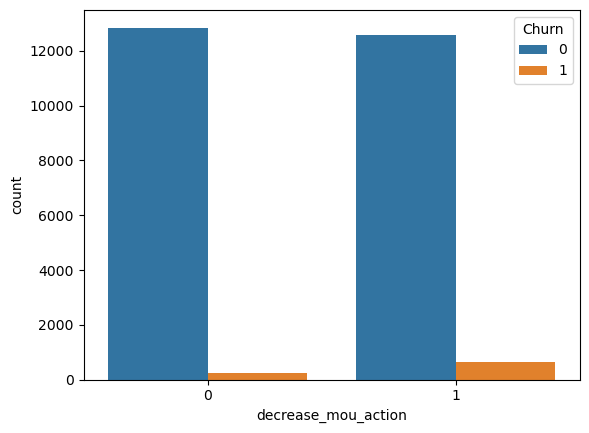

In [158]:
sns.countplot(x='decrease_mou_action', hue='Churn', data=data)
plt.xlabel('decrease_mou_action')
plt.ylabel('count')
plt.show()


Churn is More For Customers who decreased their Minutes of use in action Phase

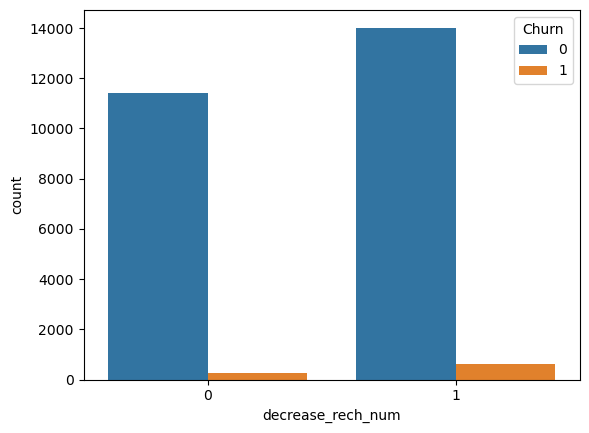

In [159]:
sns.countplot(x='decrease_rech_num', hue='Churn', data=data)
plt.xlabel('decrease_rech_num')
plt.ylabel('count')
plt.show()

Churn is more for Customer who have decreased recharge number in action Phase

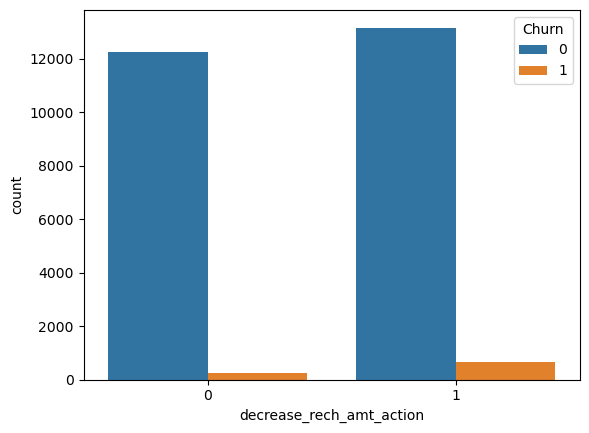

In [160]:
sns.countplot(x='decrease_rech_amt_action', hue='Churn', data=data)
plt.xlabel('decrease_rech_amt_action')
plt.ylabel('count')
plt.show()

Churn is more for Customer who have decreased recharge amount in action Phase

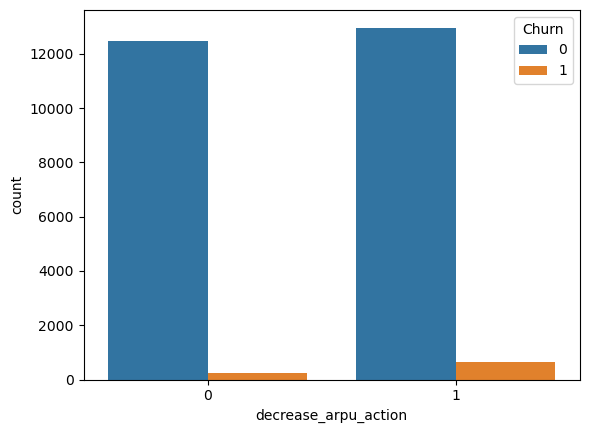

In [161]:
sns.countplot(x='decrease_arpu_action', hue='Churn', data=data)
plt.xlabel('decrease_arpu_action')
plt.ylabel('count')
plt.show()

Churn is more for Customer for whom revenue has been decreased

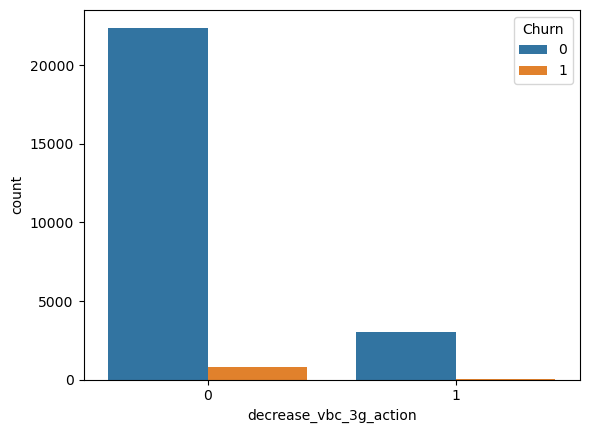

In [162]:
sns.countplot(x='decrease_vbc_3g_action', hue='Churn', data=data)
plt.xlabel('decrease_vbc_3g_action')
plt.ylabel('count')
plt.show()

Churn rate is more for customer whose volume based cost is increased in action Phase

<Axes: xlabel='avg_rech_num_action', ylabel='avg_rech_amt_action'>

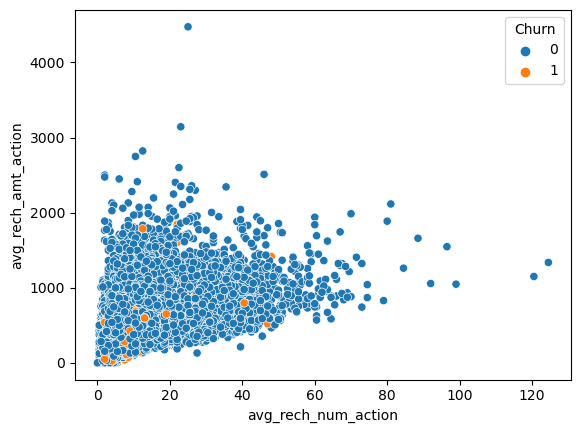

In [163]:
sns.scatterplot(data=data,x='avg_rech_num_action',y='avg_rech_amt_action',hue='Churn')

Dropping columns not required for analysis

In [164]:
data=data.drop(['total_mou_good','avg_mou_action','diff','avg_rech_num_action','diff_rech_num','avg_rech_amt_action','diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc'],axis=1)

In [165]:
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,Churn,decrease_mou_action,decrease_rech_num,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_3g_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,1,1,1,1,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1,0,1,1,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,1,1,1,1,1
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4

# Train-Test Split

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X=data.drop(['mobile_number','Churn'],axis=1)
y=data['Churn']

In [168]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=100)

Dealing With Data Imbalance

In [169]:
from imblearn.over_sampling import SMOTE

In [170]:
sm=SMOTE(random_state=27)

In [171]:
X_train,y_train=sm.fit_resample(X_train,y_train)

In [172]:
y_train.value_counts()

Churn
0    20353
1    20353
Name: count, dtype: int64

# Feature Scaling

In [173]:
col_scale=X_train.columns.to_list()
col_scale.remove('decrease_mou_action')
col_scale.remove('decrease_rech_num')
col_scale.remove('decrease_rech_amt_action')
col_scale.remove('decrease_arpu_action')
col_scale.remove('decrease_vbc_3g_action')

In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
scaler=StandardScaler()
X_train[col_scale]=scaler.fit_transform(X_train[col_scale])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,decrease_mou_action,decrease_rech_num,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_3g_action
0,-0.537235,-0.792020,0.855299,-0.776058,-0.746661,-0.565334,-0.702707,-0.748782,-0.244199,-0.249268,-0.255228,-0.315129,-0.328404,-0.384731,-0.436315,-0.303132,-0.347235,-0.299135,-0.029977,-0.158361,0.490333,-0.175859,-0.213474,-0.161527,-0.192759,-0.253351,-0.228538,-0.218279,-0.334446,0.128965,-0.648929,-0.597234,-0.425422,-0.639273,-0.626114,-0.440577,-0.142832,-0.136224,-0.118811,-0.936826,-0.882885,-0.584494,-0.081661,-0.091165,-0.054562,-0.156293,-0.223762,-0.115401,0.227665,-0.014003,-0.013351,-1.032018,-1.020480,-0.456211,1.707318,-0.082449,-0.239483,-0.052728,0.495877,3.334176,0.376523,0.108556,0.775506,0.858728,0.312069,2.282811,-0.236572,-0.228473,-0.211529,-0.344040,-0.310174,-0.246539,-0.151364,-0.153979,-0.123549,-0.397560,-0.368033,-0.302682,0.523159,0.064500,1.796133,-0.382962,-0.095899,-0.200681,-0.163547,-0.155750,-0.130527,-0.081262,-0.076607,-0.071680,0.693636,-0.178377,0.079332,-0.461633,-0.706180,0.744740,-0.783620,0.077677,0.258434,-0.395821,-0.541719,0.316931,0.569247,3.573337,1.142282,-0.25962,-0.277114,-0.260281,-0.250441,3.144562,3.467167,0.464626,-0.269451,0.402979,-0.214532,-0.21686,-0.210522,-0.133711,1.321987,-0.117689,-1.066378,-0.257679,-0.264023,-0.257110,-0.792897,0,1,0,0,0
1,0.552510,-1.830325,-0.636036,0.556304,-0.708430,-0.354788,-0.313746,-0.807136,-0.447526,-0.249268,-0.255228,-0.315129,-0.328404,-0.384731,-0.436315,3.059409,-0.251257,0.173026,0.936765,-0.295315,0.048193,-0.062822,-0.277677,-0.257272,-0.192759,-0.253351,-0.228538,2.495890,-0.361404,0.119522,-0.575008,-0.597234,-0.414663,-0.632921,-0.626114,-0.431107,-0.142832,-0.136224,-0.118811,-0.877904,-0.882885,-0.570861,-0.081661,-0.091165,-0.054562,-0.345305,-0.380157,-0.273645,-0.311965,-0.014003,-0.013351,0.254135,-1.037995,-0.453945,2.176938,-0.227569,0.212226,0.003120,-0.543811,-0.159559,-0.285201,-0.269477,-0.250976,1.031184,-0.529093,-0.040763,-0.061942,-0.218421,-0.211529,-0.344040,-0.267664,-0.219535,-0.151364,-0.153979,-0.111232,-0.294205,-0.331055,-0.279585,0.716851,-0.617316,-0.161725,-0.382962,-0.095899,-0.200681,-0.163547,-0.155750,-0.130527,-0.0204

In [176]:
X_test[col_scale]=scaler.transform(X_test[col_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,decrease_mou_action,decrease_rech_num,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_3g_action
43013,-0.360345,0.307909,0.830348,-0.514821,-0.544735,0.315891,-0.034189,0.657386,0.985671,-0.249268,-0.255228,-0.315129,-0.328404,-0.384731,-0.436315,-0.058207,-0.014795,1.663666,1.424514,2.875111,2.492809,0.293178,2.037568,4.116714,-0.192759,-0.253351,-0.198347,0.877385,1.894922,2.807315,-0.648929,-0.579198,-0.422543,-0.641480,-0.625525,-0.431043,11.917326,5.035954,4.471149,-0.747611,-0.772061,-0.493923,-0.081661,-0.086213,-0.054562,-0.334259,-0.270735,0.689998,-0.311965,-0.014003,-0.013351,-0.352993,0.124770,0.950878,-0.269842,-0.156101,2.427085,-0.077577,0.559465,0.064105,4.244192,3.670424,2.150838,0.440187,0.864631,1.528094,-0.160574,-0.202160,-0.189276,-0.340232,-0.193848,-0.100598,5.052422,0.731997,0.039034,0.180594,-0.169439,-0.157215,0.663077,0.651212,1.259943,-0.382962,-0.095899,-0.200681,1.023923,-0.092099,0.147696,1.148212,0.597899,-0.071680,-0.850624,0.069642,-0.049069,-0.706780,0.126802,0.489314,-0.473680,-0.487255,0.225597,-0.025749,0.013337,0.795648,-0.247434,0.039471,-0.204876,-0.25962,0.146660,-0.260281,-0.250441,-0.248571,-0.234819,-0.258959,-0.269451,-0.268037,-0.214532,-0.21686,-0.210522,-0.133711,2.778789,-0.117689,0.121169,-0.132526,0.407272,-0.251110,-0.393084,0,0,0,0,0
13786,-1.103077,0.476063,1.621765,-0.740016,-0.491387,-0.141409,-0.585092,2.246744,4.799831,0.114070,0.231986,-0.315129,0.596164,-0.129620,-0.436315,-0.258441,0.109036,0.517044,-0.646681,-0.402749,0.473675,-0.275903,-0.277677,-0.257272,-0.192759,0.867374,1.651698,-0.584407,-0.196101,0.596404,-0.648929,-0.530593,-0.340111,-0.496148,2.521593,5.350332,-0.142832,-0.136224,-0.118811,-0.834467,1.375866,3.265058,-0.081661,-0.091165,-0.054562,-0.345305,0.242107,0.570890,-0.014711,-0.014003,-0.013351,-1.103416,1.250047,3.180036,-0.140741,0.045837,0.465827,-0.446835,-0.328260,0.443501,-0.258256,-0.269477,0.026452,-0.421089,-0.241409,0.536214,-0.229713,-0.225812,-0.203597,-0.290270,0.178060,0.459804,-0.062948,1.441621,0.024254,-0.346572,0.173253,0.284938,-0.537938,-0.154656,0.533040,-0.382962,-0.095899,-0.200681,-0.163547,-0.155750,-0.130527,-0.081262,-0.088724,-0.071680,-0.731835

# Logistic Regression

In [177]:
import statsmodels.api as sm

In [178]:
logm1=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
model=logm1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                40706
Model:                            GLM   Df Residuals:                    40575
Model Family:                Binomial   Df Model:                          130
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 05 Oct 2024   Deviance:                       3931.2
Time:                        10:26:40   Pearson chi2:                 3.42e+05
No. Iterations:                    50   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     4904.8515   2.07e+05      0.024      0.981   -4.01e+05    4.11e+05
arpu_6                      -0.0981      0.153     -0.640      0.522      -0.398       0.202
arpu_7                       0.1291      0.159      0.813      0.416      -0.182       0.440
arpu_8                       0.1765      0.241      0.733      0.464      -0.295       0.649
onnet_mou_6                 11.7481      7.783      1.509      0.131      -3.506      27.002
onnet_mou_7                 -1.3483      3.807     -0.354      0.723      -8.810       6.114
onnet_mou_8                 -2.2506      4.072     -0.553      0.581     -10.232       5.731
offnet_mou_6                11.0231      7.487      1.472      0.141      -3.652      25.698
offnet_mou_7                -0.7895      3.556     -0.222      0.824      -7.758       6.179
offnet_mou_8                -2.8174      3.976     -0.709      0.479     -10.611       4.976
roam_ic_mou_6                0.0511      0.056      0.908      0.364      -0.059       0.161
roam_ic_mou_7               -0.0195      0.078     -0.251      0.801      -0.171       0.132
roam_ic_mou_8                0.0594      0.069      0.862      0.389      -0.076       0.194
roam_og_mou_6               -3.0005      2.028     -1.480      0.139      -6.975       0.974
roam_og_mou_7                0.2968      0.956      0.310      0.756      -1.577       2.171
roam_og_mou_8                0.9169      1.190      0.770      0.441      -1.416       3.250
loc_og_t2t_mou_6         -1113.4928   1361.271     -0.818      0.413   -3781.536    1554.550
loc_og_t2t_mou_7          -394.0601   1436.316     -0.274      0.784   -3209.188    2421.068
loc_og_t2t_mou_8          3236.8225   1513.269      2.139      0.032     270.871    6202.774
loc_og_t2m_mou_6         -1122.8228   1372.528     -0.818      0.413   -3812.929    1567.283
loc_og_t2m_mou_7          -380.8075   1386.337     -0.275      0.784   -3097.978    2336.363
loc_og_t2m_mou_8          3509.2591   1640.581      2.139      0.032     293.779    6724.739
loc_og_t2f_mou_6          -103.7853    126.737     -0.819      0.413    -352.186     144.615
loc_og_t2f_mou_7           -34.8576    127.233     -0.274      0.784    -284.229     214.514
loc_og_t2f_mou_8           294.3716    137.676      2.138      0.033      24.532     564.211
loc_og_t2c_mou_6             0.0025      0.053      0.047      0.963      -0.102       0.107
loc_og_t2c_mou_7             0.0636      0.048      1.327      0.185      -0.030       0.158
loc_og_t2c_mou_8            -0.0104      0.064     -0.163      0.871      -0.135       0.114
loc_og_mou_6               220.4170   2652.750      0.083      0.934   -4978.878    5419.712
loc_og_mou_7              2004.2271   2813.027      0.712      0.476   -3509.205    7517.659
loc_og_mou_8  

In [179]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [180]:
logreg=LogisticRegression()
rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [181]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_6', False, 89),
 ('arpu_7', False, 102),
 ('arpu_8', False, 34),
 ('onnet_mou_6', False, 31),
 ('onnet_mou_7', False, 91),
 ('onnet_mou_8', False, 9),
 ('offnet_mou_6', False, 98),
 ('offnet_mou_7', False, 32),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 109),
 ('roam_ic_mou_7', False, 27),
 ('roam_ic_mou_8', False, 50),
 ('roam_og_mou_6', False, 28),
 ('roam_og_mou_7', False, 65),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 61),
 ('loc_og_t2t_mou_7', False, 40),
 ('loc_og_t2t_mou_8', False, 12),
 ('loc_og_t2m_mou_6', False, 59),
 ('loc_og_t2m_mou_7', False, 16),
 ('loc_og_t2m_mou_8', False, 15),
 ('loc_og_t2f_mou_6', False, 108),
 ('loc_og_t2f_mou_7', False, 69),
 ('loc_og_t2f_mou_8', False, 78),
 ('loc_og_t2c_mou_6', False, 64),
 ('loc_og_t2c_mou_7', False, 110),
 ('loc_og_t2c_mou_8', False, 83),
 ('loc_og_mou_6', False, 68),
 ('loc_og_mou_7', False, 76),
 ('loc_og_mou_8', False, 62),
 ('std_og_t2t_mou_6', False, 103),
 ('std_og_t2t_mou_7', False, 92),

In [182]:
rfe_col=X_train.columns[rfe.support_]
rfe_col

Index(['offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_7',
       'isd_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'ic_others_8', 'total_rech_amt_7', 'monthly_2g_8',
       'monthly_3g_8', 'decrease_rech_amt_action', 'decrease_vbc_3g_action'],
      dtype='object')

# Model-1 with RFE Selected columns

In [183]:
X_train_sm=sm.add_constant(X_train[rfe_col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model1=logm2.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                40706
Model:                            GLM   Df Residuals:                    40690
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 05 Oct 2024   Deviance:                       28406.
Time:                        10:28:48   Pearson chi2:                 3.58e+07
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -50.1448   4225.308     -0.012      0.991   -8331.597    8231.307
offnet_mou_8                -1.8567      0.100    -18.549      0.000      -2.053      -1.661
roam_og_mou_8                1.1914      0.034     34.710      0.000       1.124       1.259
std_og_t2m_mou_8             1.6774      0.090     18.640      0.000       1.501       1.854
std_og_mou_7                 0.9212      0.029     31.683      0.000       0.864       0.978
isd_og_mou_8                -0.7094      0.149     -4.757      0.000      -1.002      -0.417
og_others_8              -3704.7424   3.16e+05     -0.012      0.991   -6.24e+05    6.17e+05
total_og_mou_8              -1.1454      0.032    -35.730      0.000      -1.208      -1.083
loc_ic_t2f_mou_8            -0.9769      0.076    -12.865      0.000      -1.126      -0.828
loc_ic_mou_8                -1.4253      0.062    -22.899      0.000      -1.547      -1.303
ic_others_8                 -1.7353      0.168    -10.311      0.000      -2.065      -1.405
total_rech_amt_7            -0.2169      0.023     -9.457      0.000      -0.262      -0.172
monthly_2g_8                -0.9597      0.051    -18.780      0.000      -1.060      -0.860
monthly_3g_8                -1.1002      0.060    -18.220      0.000      -1.219      -0.982
decrease_rech_amt_action    -0.4333      0.036    -12.116      0.000      -0.503      -0.363
decrease_vbc_3g_action      -1.2600      0.079    -15.912      0.000      -1.415      -1.105
============================================================================================
"""

In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [185]:
vif=pd.DataFrame()
vif['Features']=X_train[rfe_col].columns
vif['VIF']=[variance_inflation_factor(X_train[rfe_col].values,i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif


,Features,VIF
0,offnet_mou_8,8.03
2,std_og_t2m_mou_8,6.75
6,total_og_mou_8,2.84
3,std_og_mou_7,2.37
10,total_rech_amt_7,1.81
8,loc_ic_mou_8,1.72
1,roam_og_mou_8,1.27
7,loc_ic_t2f_mou_8,1.21
13,decrease_rech_amt_action,1.17
14,decrease_vbc_3g_action,1.15


Removing column og_others_8 due to high p-value

In [186]:
X_train_new=X_train[rfe_col]
X_train_new=X_train_new.drop('og_others_8',axis=1)
X_train_sm=sm.add_constant(X_train_new)
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model2=logm3.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                40706
Model:                            GLM   Df Residuals:                    40691
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14237.
Date:                Sat, 05 Oct 2024   Deviance:                       28473.
Time:                        10:30:47   Pearson chi2:                 3.86e+07
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4968
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.6880      0.034    -19.948      0.000      -0.756      -0.620
offnet_mou_8                -1.8635      0.100    -18.613      0.000      -2.060      -1.667
roam_og_mou_8                1.1973      0.034     34.850      0.000       1.130       1.265
std_og_t2m_mou_8             1.6823      0.090     18.693      0.000       1.506       1.859
std_og_mou_7                 0.9202      0.029     31.696      0.000       0.863       0.977
isd_og_mou_8                -0.7195      0.148     -4.847      0.000      -1.010      -0.429
total_og_mou_8              -1.1435      0.032    -35.705      0.000      -1.206      -1.081
loc_ic_t2f_mou_8            -0.9784      0.076    -12.887      0.000      -1.127      -0.830
loc_ic_mou_8                -1.4221      0.062    -22.859      0.000      -1.544      -1.300
ic_others_8                 -1.7393      0.168    -10.327      0.000      -2.069      -1.409
total_rech_amt_7            -0.2180      0.023     -9.517      0.000      -0.263      -0.173
monthly_2g_8                -0.9590      0.051    -18.757      0.000      -1.059      -0.859
monthly_3g_8                -1.0991      0.060    -18.190      0.000      -1.217      -0.981
decrease_rech_amt_action    -0.4316      0.036    -12.083      0.000      -0.502      -0.362
decrease_vbc_3g_action      -1.2628      0.079    -15.971      0.000      -1.418      -1.108
============================================================================================
"""

In [187]:
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,offnet_mou_8,8.03
2,std_og_t2m_mou_8,6.75
5,total_og_mou_8,2.84
3,std_og_mou_7,2.37
9,total_rech_amt_7,1.81
7,loc_ic_mou_8,1.72
1,roam_og_mou_8,1.27
6,loc_ic_t2f_mou_8,1.21
12,decrease_rech_amt_action,1.17
13,decrease_vbc_3g_action,1.15


Removing offnet_mou_8 due to High VIF

In [189]:
X_train_new=X_train_new.drop('offnet_mou_8',axis=1)
X_train_sm=sm.add_constant(X_train_new)
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model3=logm4.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                40706
Model:                            GLM   Df Residuals:                    40692
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14445.
Date:                Sat, 05 Oct 2024   Deviance:                       28890.
Time:                        10:40:34   Pearson chi2:                 5.78e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4916
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.6372      0.034    -18.501      0.000      -0.705      -0.570
roam_og_mou_8                0.8940      0.029     30.380      0.000       0.836       0.952
std_og_t2m_mou_8             0.0638      0.021      3.095      0.002       0.023       0.104
std_og_mou_7                 1.1137      0.028     39.934      0.000       1.059       1.168
isd_og_mou_8                -0.7977      0.158     -5.055      0.000      -1.107      -0.488
total_og_mou_8              -1.2938      0.032    -40.320      0.000      -1.357      -1.231
loc_ic_t2f_mou_8            -0.9657      0.077    -12.535      0.000      -1.117      -0.815
loc_ic_mou_8                -2.0090      0.058    -34.778      0.000      -2.122      -1.896
ic_others_8                 -1.7745      0.169    -10.479      0.000      -2.106      -1.443
total_rech_amt_7            -0.3038      0.022    -13.717      0.000      -0.347      -0.260
monthly_2g_8                -0.9521      0.052    -18.484      0.000      -1.053      -0.851
monthly_3g_8                -1.0983      0.061    -17.912      0.000      -1.218      -0.978
decrease_rech_amt_action    -0.4342      0.035    -12.271      0.000      -0.504      -0.365
decrease_vbc_3g_action      -1.2128      0.079    -15.425      0.000      -1.367      -1.059
============================================================================================
"""

In [190]:
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,total_og_mou_8,2.34
2,std_og_mou_7,1.99
1,std_og_t2m_mou_8,1.85
8,total_rech_amt_7,1.69
6,loc_ic_mou_8,1.57
5,loc_ic_t2f_mou_8,1.21
11,decrease_rech_amt_action,1.17
0,roam_og_mou_8,1.15
12,decrease_vbc_3g_action,1.15
10,monthly_3g_8,1.10


# Model Performance on Train Set

In [191]:
y_train_pred=model3.predict(X_train_sm)
y_train_pred.head()

0    0.000077
1    0.374558
2    0.987377
3    0.330612
4    0.105994
dtype: float64

In [192]:
y_train_pred_final=pd.DataFrame({'churn':y_train.values,'churn_prob':y_train_pred.values})
y_train_pred_final['CustID']=y_train_pred_final.index
y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.000077,0
1,0,0.374558,1
2,0,0.987377,2
3,0,0.330612,3
4,0,0.105994,4


In [193]:
prob_cutoff=[float(i/10) for i in range (10)]
for i in prob_cutoff:
    y_train_pred_final[i]=y_train_pred_final['churn_prob'].map(lambda X:1 if X>i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000077,0,1,0,0,0,0,0,0,0,0,0
1,0,0.374558,1,1,1,1,1,0,0,0,0,0,0
2,0,0.987377,2,1,1,1,1,1,1,1,1,1,1
3,0,0.330612,3,1,1,1,1,0,0,0,0,0,0
4,0,0.105994,4,1,1,0,0,0,0,0,0,0,0


Calculating Sensitivity,Accuracy,Specificity for Different Probability Values

In [194]:
cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
num=[float(i/10) for i in range(10)]
for k in num:
    cm=confusion_matrix(y_train_pred_final.churn,y_train_pred_final[k])
    total=sum(sum(cm))
    accuracy=accuracy_score(y_train_pred_final.churn,y_train_pred_final[k])
    sensitivity=cm[1,1]/(cm[1,1]+cm[1,0])
    specificity=cm[0,0]/(cm[0,0]+cm[0,1])
    cutoff_df.loc[k]=[k,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.500000     1.000000     0.000000
0.1   0.1  0.754803     0.983983     0.525623
0.2   0.2  0.796467     0.968850     0.624085
0.3   0.3  0.826021     0.952292     0.699749
0.4   0.4  0.846313     0.930821     0.761804
0.5   0.5  0.859382     0.898099     0.820665
0.6   0.6  0.863902     0.855255     0.872550
0.7   0.7  0.853093     0.788336     0.917850
0.8   0.8  0.777821     0.605120     0.950523
0.9   0.9  0.638063     0.302216     0.973910


<Axes: xlabel='prob'>

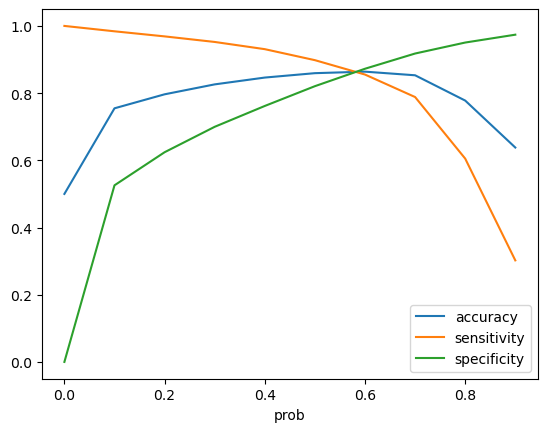

In [195]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensitivity','specificity'])

Cut off Point is 0.6 at which Sensitivity,Specificity,accuracy is stable

In [196]:
y_train_pred_final['predicted']=y_train_pred_final['churn_prob'].map(lambda X: 1 if X>0.6 else  0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.000077,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.374558,1,1,1,1,1,0,0,0,0,0,0,0
2,0,0.987377,2,1,1,1,1,1,1,1,1,1,1,1
3,0,0.330612,3,1,1,1,1,0,0,0,0,0,0,0
4,0,0.105994,4,1,1,0,0,0,0,0,0,0,0,0


Metrics

In [197]:
confusion=confusion_matrix(y_train_pred_final.churn,y_train_pred_final.predicted)
confusion

array([[17759,  2594],
       [ 2946, 17407]], dtype=int64)

In [198]:
accuracy_score(y_train_pred_final.churn,y_train_pred_final.predicted)

0.8639021274504987

In [199]:
Sensitivity=confusion[1,1]/(confusion[1,1]+confusion[1,0])
Sensitivity

0.8552547535989781

In [200]:
Specificity=confusion[0,0]/(confusion[0,0]+confusion[0,1])
Specificity

0.8725495013020194

Checking Precison and Recall

first will calculate for 0.5 score

In [201]:
from sklearn.metrics import precision_score,recall_score

In [202]:
precision=precision_score(y_train_pred_final.churn,y_train_pred_final[0.5])
precision

0.833553741620685

In [203]:
recall=recall_score(y_train_pred_final.churn,y_train_pred_final[0.5])
recall

0.898098560408785

For 0.5 cut-off we are getting better Recall

In [204]:
from sklearn.metrics import roc_curve
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

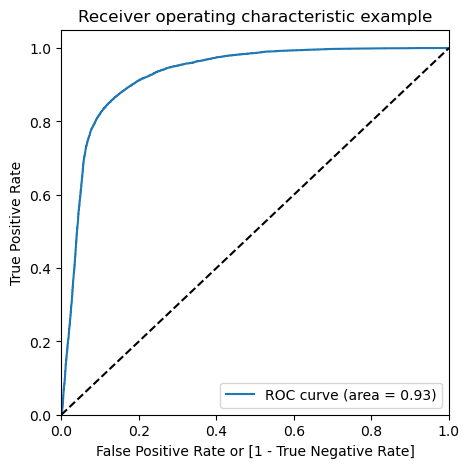

In [205]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

Testing Model on Test Set

In [206]:
test_var=X_train_new.columns.to_list()
test_var

['roam_og_mou_8',
 'std_og_t2m_mou_8',
 'std_og_mou_7',
 'isd_og_mou_8',
 'total_og_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'ic_others_8',
 'total_rech_amt_7',
 'monthly_2g_8',
 'monthly_3g_8',
 'decrease_rech_amt_action',
 'decrease_vbc_3g_action']

In [207]:
X_test_new=X_test[test_var]
X_test_new

,roam_og_mou_8,std_og_t2m_mou_8,std_og_mou_7,isd_og_mou_8,total_og_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,ic_others_8,total_rech_amt_7,monthly_2g_8,monthly_3g_8,decrease_rech_amt_action,decrease_vbc_3g_action
43013,-0.436315,-0.431043,-0.772061,-0.054562,0.950878,2.150838,1.528094,-0.071680,0.126802,-0.234819,-0.210522,0,0
13786,-0.436315,5.350332,1.375866,-0.054562,3.180036,0.026452,0.536214,-0.071680,1.137085,-0.234819,-0.210522,0,0
99925,-0.436315,-0.309217,1.669588,-0.054562,1.594766,-0.004538,-0.250648,-0.071680,1.812837,-0.234819,-0.210522,0,0
33644,-0.129235,-0.423333,-0.775169,-0.054562,0.028160,1.834453,2.330701,-0.016348,0.544966,-0.234819,-0.210522,1,0
77701,-0.436315,-0.409128,-0.871962,-0.054562,-0.342074,0.356413,0.998557,0.539987,-0.435210,-0.234819,-0.210522,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40465,0.043532,-0.397355,-0.744898,-0.054562,-0.027518,0.018483,0.476177,-0.071680,1.321077,-0.234819,-0.210522,0,0
20242,-0.436315,-0.415591,0.126891,-0.054562,-0.775907,-0.253337,0.045857,-0.071680,-0.686108,-0.234819,-0.210522,1,0
79744,-0.436315,-0.433858,-0.783343,0.027707,-0.411385,0.076035,0.409310,-0.071680,0.759065,-0.234819,-0.210522,1,0
78816,1.341331,-0.339002,-0.481896,-0.054562,-0.058121,-0.253337,0.764911,-0.071680,1.384638,-0.234819,-0.210522,0,0


In [208]:
X_test_new_sm=sm.add_constant(X_test_new)

In [209]:
y_test_pred=model3.predict(X_test_new_sm)
y_test_pred.head()

43013    0.000450
13786    0.016451
99925    0.338939
33644    0.000273
77701    0.009067
dtype: float64

In [210]:
y_test_pred=pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
43013,0.000450
13786,0.016451
99925,0.338939
33644,0.000273
77701,0.009067


In [211]:
y_test_df=pd.DataFrame(y_test)
y_test_df.head()

,Churn
43013,0
13786,0
99925,0
33644,0
77701,0


In [212]:
y_test_df['CustID']=y_test_df.index
y_test_df.head()

,Churn,CustID
43013,0,43013
13786,0,13786
99925,0,99925
33644,0,33644
77701,0,77701


In [213]:
y_test_df.reset_index(drop=True,inplace=True)
y_test_pred.reset_index(drop=True,inplace=True)

In [214]:
y_test_df_final=pd.concat([y_test_df,y_test_pred],axis=1)

In [215]:
y_test_df_final.head()

,Churn,CustID,0
0,0,43013,0.000450
1,0,13786,0.016451
2,0,99925,0.338939
3,0,33644,0.000273
4,0,77701,0.009067


In [216]:
y_test_df_final=y_test_df_final.rename(columns={0:"churn_prob"})

In [217]:
y_test_df_final['predicted']=y_test_df_final['churn_prob'].map(lambda X: 1 if X>0.5 else 0)
y_test_df_final.head()

,Churn,CustID,churn_prob,predicted
0,0,43013,0.000450,0
1,0,13786,0.016451,0
2,0,99925,0.338939,0
3,0,33644,0.000273,0
4,0,77701,0.009067,0


In [218]:
Accuracy=accuracy_score(y_test_df_final.Churn,y_test_df_final.predicted)
Accuracy

0.823585263957463

In [219]:
Precision=precision_score(y_test_df_final.Churn,y_test_df_final.predicted)
Precision

0.13288069835111543

In [220]:
recall=recall_score(y_test_df_final.Churn,y_test_df_final.predicted)
recall

0.7965116279069767

In [221]:
confusion=confusion_matrix(y_test_df_final.Churn,y_test_df_final.predicted)
confusion

array([[4200,  894],
       [  35,  137]], dtype=int64)

In [222]:
TN=confusion[0,0]
FP=confusion[0,1]
Specificity=TN/(TN+FP)
Specificity

0.8244994110718492

Overall Model is performing good on Test Set

Most of the Coeffecients are Negative which indicates that is there is inverse relation between Churn Probability and these variables

In [223]:
data_churn=data[data.Churn==1]
data_notchurn=data[data.Churn==0]

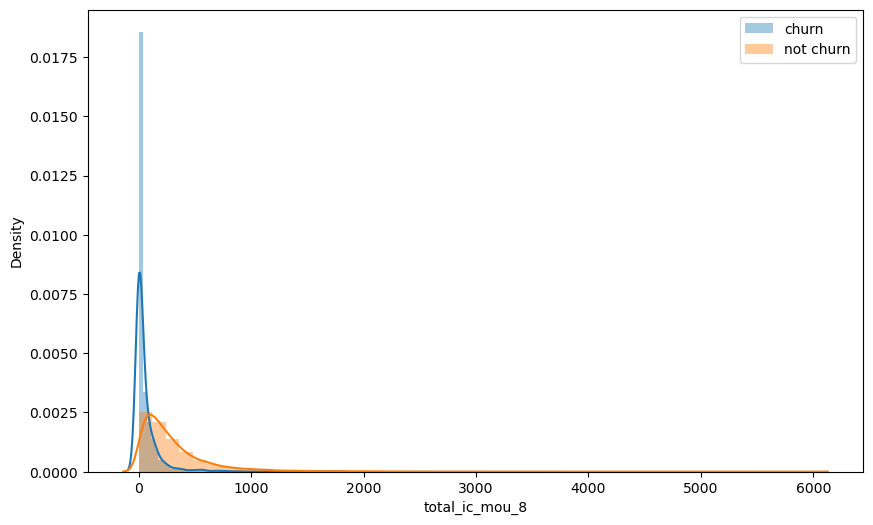

In [224]:
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['total_ic_mou_8'],label='churn')
sns.distplot(data_notchurn['total_ic_mou_8'],label='not churn')
plt.legend()
plt.show()

from Graph it is clear that minute of use is smaller for the month of august for churn Customers

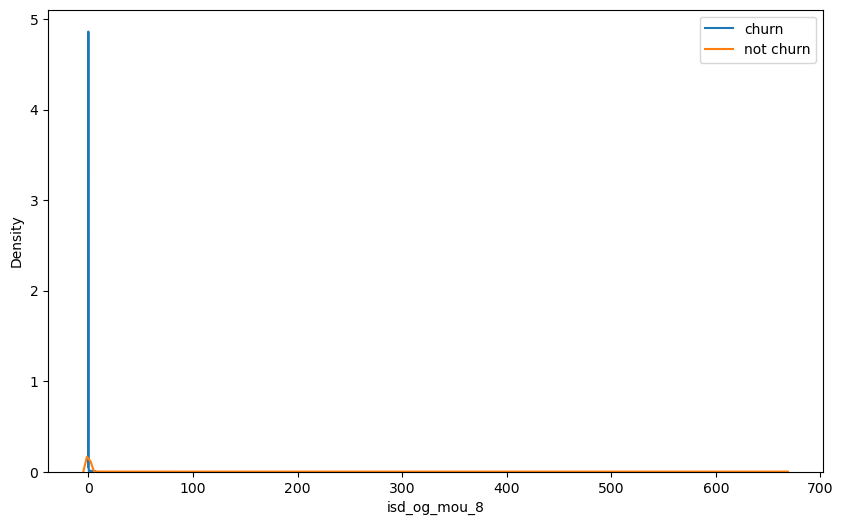

In [225]:
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_notchurn['isd_og_mou_8'],label='not churn',hist=False)
plt.legend()
plt.show()

ISD outgoing minute usage for churn customers is densed near zero.while for non churn customers more than zero.

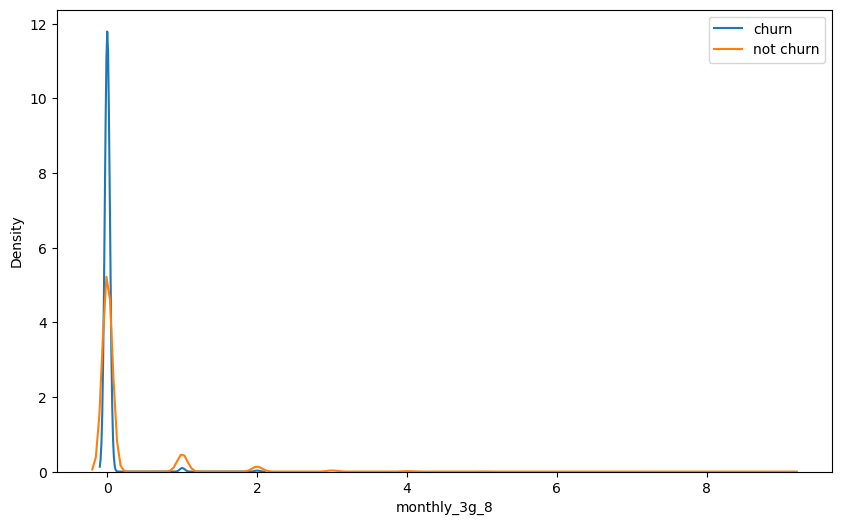

In [227]:
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_notchurn['monthly_3g_8'],label='not churn',hist=False)
plt.legend()
plt.show()

Monthly 3g uses for churn customer is spread for very less range